In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()
suffix_results = "epsilon_values_V1.csv"
path_results = os.path.join(cwd, suffix_results)
df = pd.read_csv(path_results)
df.sort_values("epsilon", inplace = True)
df

,epsilon,total_cost,Run_time
18,0.001000,4884.122098,32.769
42,0.011091,4884.043361,28.601
17,0.021182,4884.043361,26.718
37,0.031273,4884.043361,30.628
16,0.041364,4884.043241,24.465
...,...,...,...
1,0.626636,20931.146151,2.101
8,0.636727,5905.117637,2.307
50,0.646818,20877.263965,2.966
11,0.656909,16860.839047,2.822


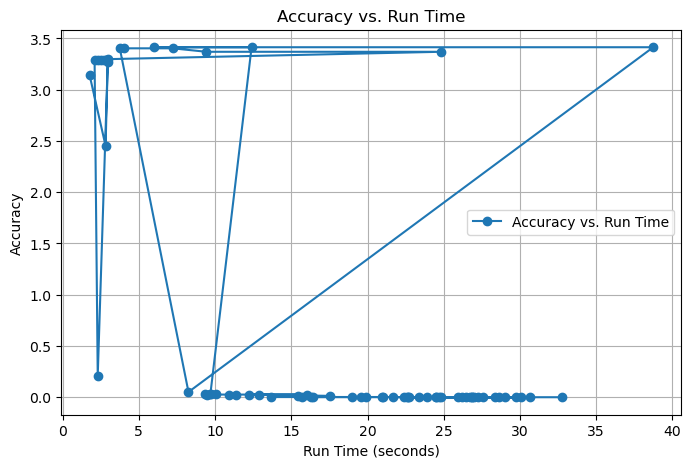

In [5]:
# Compute accuracy
total_cost_001 = df.loc[df["epsilon"] == 0.001, "total_cost"].values[0]
df["accuracy"] = abs((total_cost_001 - df["total_cost"]) / total_cost_001)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df["Run_time"], df["accuracy"], marker='o', linestyle='-', label="Accuracy vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Run Time")
plt.grid()
plt.legend()
plt.show()

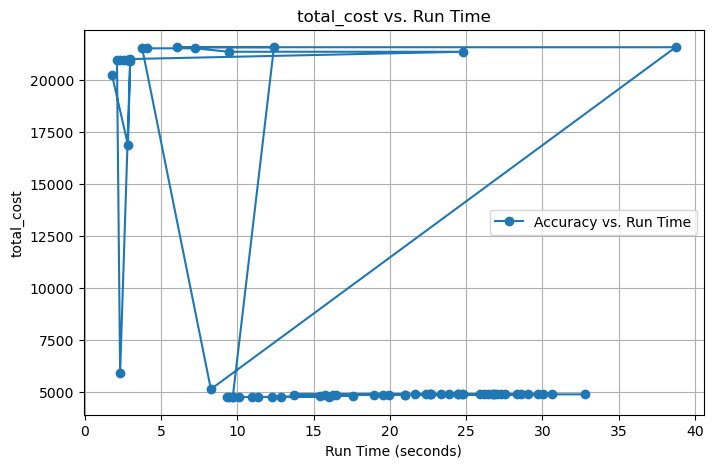

In [6]:
# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df["Run_time"], df["total_cost"], marker='o', linestyle='-', label="Accuracy vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("total_cost")
plt.title("total_cost vs. Run Time")
plt.grid()
plt.legend()
plt.show()